# Networkx

* Пакет для Python для манипулирования графиками и их анализа
* Содержит множество стандатных алгоритмов для графов

In [2]:
import networkx as nx

Networkx поддерживает неориентированные/ориентированные графы/мультиграфы (мультиграфы позволяют одной паре узлов иметь несколько ребер):
*  Неориентированный граф: `nx.Graph`
*  Ориентированный граф: `nx.DiGraph`
*  Неориентированный мультиграф: `nx.MultiGraph`
*  Ориентированный мультиграф: `nx.MultiDiGraph`

In [3]:
G = nx.Graph()

Networkx имеет отличный набор методов для отображения графов. Напишем функцию, которую будем использовать на вывода графов на экран

In [4]:
def plot_graph(G):
    options = dict(
        font_size=12,
        node_size=500,
        node_color="white",
        edgecolors="black",
    )
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, **options)
    if nx.is_weighted(G):
        labels = {e: G.edges[e]['weight'] for e in G.edges}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

Классы графов имеют интерфейс для явного добавления ребер и узлов. Следующие команды, например, строят граф ниже

![graph 1](graph_1.png)

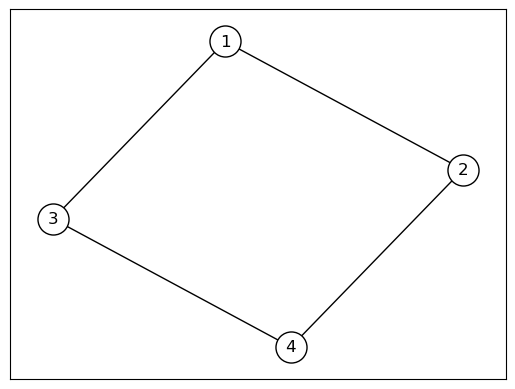

In [5]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 4)
G.add_edge(3, 4)
plot_graph(G)
#test commit

Мы также можем создать граф напрямую из списка ребер:

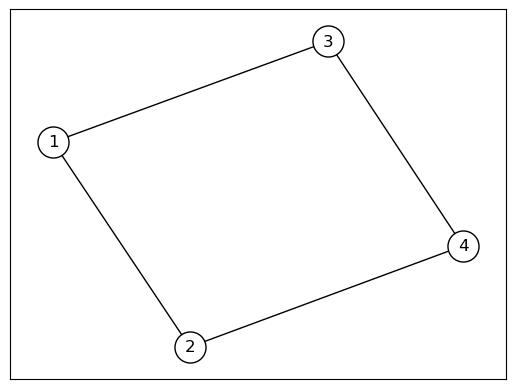

In [32]:
G = nx.Graph()
edges = [(1, 2), (1, 3), (2, 4), (3, 4)]
G.add_edges_from(edges)
plot_graph(G)

Опционально мы всегда можем сделать граф взвешенным. Для этого в метод `add_edge()` передается ключевое слово `weight`. Тоже можно сделать и используя метод `add_weighted_edges_from()`:

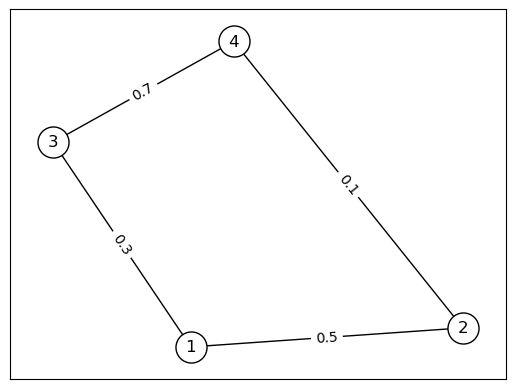

In [33]:
G = nx.Graph()
edges = [(1, 2, 0.5), (1, 3, 0.3), (2, 4, 0.1), (3, 4, 0.7)]
G.add_weighted_edges_from(edges)
plot_graph(G)

Названия узлов могут быть произвольными hashable. Мы также может добавлять произвольные аттрибуты в узлам и ребрам:

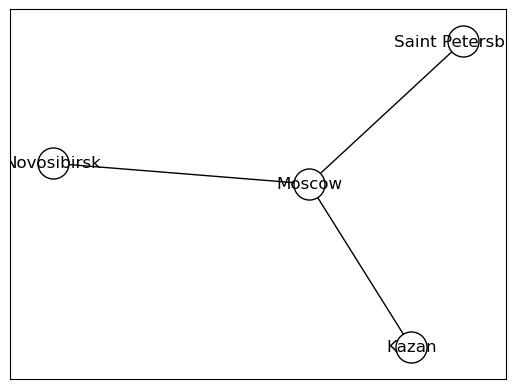

In [34]:
G = nx.Graph()
G.add_nodes_from([
    ('Moscow', dict(population=13.1)),
    ('Saint Petersburg', dict(population=5.6)),
    ('Kazan', dict(population=1.3)),
    ('Novosibirsk', dict(population=1.6)),
])
G.add_edge('Moscow', 'Saint Petersburg', distance=712)
G.add_edge('Moscow', 'Kazan', distance=816)
G.add_edge('Moscow', 'Novosibirsk', distance=3356)
plot_graph(G)

Networkx предоставляет удобный интерфейс для доступа к узлам/ребрам и их аттрибутам, а также позволяет легко итерироваться по ним. Рассмотрим несколько популярных операций

Количество узлов в графе:

In [35]:
len(G)

4

Количество ребер в графе:

In [36]:
len(G.edges)

3

Проверка, присутствует ли узел в графе:

In [37]:
'Moscow' in G

True

In [38]:
G.has_node('Moscow')

True

Проверка, присутствует ли ребро в графе:

In [39]:
('Moscow', 'Saint Petersburg') in G.edges

True

In [40]:
G.has_edge('Moscow', 'Saint Petersburg')

True

Итерация по узлам:

In [41]:
for n in G:
    if n != 'Moscow':
        print(n)

Saint Petersburg
Kazan
Novosibirsk


Итерация по ребрам:

In [42]:
for n_in, n_out in G.edges:
    print(f'{n_in} -- {n_out}')

Moscow -- Saint Petersburg
Moscow -- Kazan
Moscow -- Novosibirsk


Итерацией по ребрам вместе с аттрибутами:

In [43]:
for n_in, n_out, dist in G.edges.data('distance'):
    print(f'{n_in} -- {n_out} ({dist} km)')

Moscow -- Saint Petersburg (712 km)
Moscow -- Kazan (816 km)
Moscow -- Novosibirsk (3356 km)


Итерация по соседям узла:

In [44]:
for n in G.neighbors('Moscow'):
    print(n)

Saint Petersburg
Kazan
Novosibirsk


Наконец, мы можем сохранять графы в файлы и вычитывать их из них. Для простых задач мы можем использовать `adjlist` и `edgelist` форматы:
* `adjlist` является компактным представлением матрицы смежности. Он не подходит для графов с аттрибутами
* `edgelist` является списком ребер с их аттрибутами
* Для обоих методов названия узлов не должны включать пробелов

In [45]:
G = nx.Graph()
edges = [(1, 2, 0.5), (1, 3, 0.3), (2, 4, 0.1), (3, 4, 0.7)]
G.add_weighted_edges_from(edges)
nx.write_adjlist(G, 'test_graph.adjlist')

In [46]:
nx.write_edgelist(G, 'test_graph.edgelist')

Методы `nx.read_adjlist()` и `nx.read_edgelist()` используются для чтения графов из файлов соответствующих форматов:

In [47]:
G_1 = nx.read_adjlist('test_graph.adjlist')
G_2 = nx.read_edgelist('test_graph.edgelist')